<a href="https://colab.research.google.com/github/Marcecr/Entrega_11/blob/main/FT/Final_Date_Science_Honey_Production_IMCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

abeja-miel-tarro_1308-33211.avif

## **Análisis de la Producción de Miel (*Apis mellifera *L.) entre 1998-2016 en EE. UU.**

**Resumen:**

Las abejas, como polinizadores clave, desempeñan un papel crucial en la ecología y la agricultura, siendo responsables de la producción de miel, un alimento valioso con propiedades antioxidantes, antiinflamatorias y antibióticas. Este estudio se enfoca en analizar los datos de producción de miel en 44 estados de EE. UU. durante el período de 1998 a 2016. Se exploran las tendencias de producción, rendimiento y precios a lo largo de este intervalo, así como posibles factores externos que puedan influir en estas fluctuaciones, como condiciones climáticas y cambios en la demanda del consumidor.

El análisis de estos datos es relevante para comprender las tendencias históricas en la producción y el precio de los productos agrícolas, así como para analistas de mercado y estudiantes interesados en la agricultura. Los datos fueron recopilados por la empresa Statistal y se encuentran en un archivo CSV con 785 registros y 8 columnas, incluyendo información sobre el estado, número de colonias, producción por colonia, producción total, existencias, precio promedio y valor de la producción.

Objetivo: **texto en negrita**

El objetivo principal es visualizar cómo ha evolucionado la producción de miel a lo largo de los años en EE. UU., desde 1998 hasta 2016.

**Hipótesis:**

H0: Alabama no es el estado que más produce miel.
HA: Alabama es el estado que más produce miel. Según el análisis DCA, es Dakota del Norte.

H0: El año 2008 no fue el de mayor producción de miel en todos los estados evaluados.
HA: El año 2008 fue el de mayor producción de miel en todos los estados evaluados.

**Preguntas de Investigación:**

¿Cómo ha variado el rendimiento de la producción de miel de 1998 a 2016?
¿Cuáles son las tendencias principales de producción en los diferentes estados?
¿Hay patrones entre la producción total de miel y el valor de la producción cada año?
¿Cómo ha cambiado el valor de la producción anualmente y está relacionado con la demanda?


Palabras Clave: **texto en negrita**
Producción de miel, Apis mellifera, Estados Unidos, Tendencias, Precios, Factores Externos, Climático.

**Materiales**

Origen de Data set:
La información fue recolectada por la empresa Statistal(https://www.statista.com/statistics/593656/us-honey-production-volume/), se encuentra en un archivo CSV(US_honey_datase_tupdated) y consta de 785 y 8 columnas.
Contiene 9 caracteristicas.
Las columnas son: 0 Unname

1 estado = state (categórica)

2 numero_colonias = numcol (numérica)

3 Producion_por_colonia = yieldpercol(numérica)

4 production = totalprod (numérica)

5 existencia = stocks (numérica)

6 promedio_precio = priceperlb (numérica)

7 value_of_production = prodvalue (numérica) 8 año = year (numérica)

Data set Temperatura media anual máxima en Estados Unidos de 1895 a 2023 (°C)

Esta DataFrame consta de dos variables: años y temperatura, sólo tomamos el intervalo de tiempo (1998- 2016)




# ** Preguntas ha resolver**


**
 Problema de Regresión
 Consideraremos la variable objetivo totalprod(producción total),la idea es predecir la produccion total basandome en otras caracteristicas del conjunto de datos.
 Problema de Clasificación Se predecirá si la producción se encuentra por encima o por debajo de la media.


# Análisis exploratorio de datos del conjunto de datos de producción de miel (1996-2016).

In [2]:
## Cargamos las librerias pandas,numpy,matplotlib, seaborn para realizar visualizacion de los datos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits import mplot3d
import datetime as dt
import plotly.offline as py

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
##Cargamos el DateFrame(csv)
df = pd.read_csv('/content/drive/MyDrive/DS/honeyproduction1998-2016.csv')
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
780,Virginia,5000.0,38,190000.0,30000.0,5.85,1112000.0,2016
781,Washington,84000.0,35,2940000.0,412000.0,1.99,5851000.0,2016
782,West Virginia,5000.0,32,160000.0,43000.0,3.92,627000.0,2016
783,Wisconsin,54000.0,62,3348000.0,1205000.0,2.67,8939000.0,2016


In [9]:
# con la funcion ".info()" de pandas proporciona la informacion de un dataframe:tipo de dtao, el numero denulos y el uso de la memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


En este resumen vemos que el dataFrame tiene 785 filas y 7 columnas ,luego muestra el nombre de cada columna ,recuento de valores nonulos y el tipo de dato de cada columna.

In [12]:
## Imprimiremos  el número y una lista de los nombres de estados (state)
state_counts = df['state'].value_counts()
num_states = len(state_counts)
unique_states = state_counts.index.tolist()

print("Number of states:", num_states)
print("State names:")

for state in unique_states:
    print(state)

Number of states: 44
State names:
Alabama
Montana
New Jersey
New York
North Carolina
North Dakota
Ohio
Oregon
Pennsylvania
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming
Arizona
Nebraska
Missouri
Iowa
Arkansas
California
Colorado
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Kansas
Mississippi
Kentucky
Louisiana
Maine
Michigan
Minnesota
New Mexico
Nevada
Oklahoma
Maryland
South Carolina


In [13]:
#### Miraremos la descripcion de las variables del DateFrame
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,785.000000,785.000000,7.850000e+02,7.850000e+02,785.000000,7.850000e+02,785.000000
mean,61686.624204,60.578344,4.140957e+06,1.257629e+06,1.695159,5.489739e+06,2006.817834
std,92748.940458,19.427831,6.884594e+06,2.211794e+06,0.930623,9.425394e+06,5.491523
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,46.000000,4.700000e+05,1.190000e+05,1.050000,9.010000e+05,2002.000000
50%,26000.000000,58.000000,1.500000e+06,3.910000e+05,1.480000,2.112000e+06,2007.000000
75%,65000.000000,72.000000,4.096000e+06,1.380000e+06,2.040000,5.559000e+06,2012.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,7.090000,8.385900e+07,2016.000000


De acuerdo con estos datos vemmos , que la mayora de las variables como numcol,yieldpercol,totalprod, presenta datos muy dispersos (maximos y minimos muy alejados).

In [15]:
##Imprimiremos la producción (totalprod), de cada estado.
max_produccion=df.groupby(['state']).totalprod.sum()
max_produccion
max_produccion_ordenado = max_produccion.sort_values(ascending=False)# Organizamos los estados en orden descendente de acurdo a la produccion de miel.
print(max_produccion_ordenado)

state
North Dakota      624435000.0
California        390315000.0
South Dakota      344361000.0
Florida           297798000.0
Montana           210125000.0
Minnesota         175432000.0
Texas             137832000.0
Wisconsin          95067000.0
Michigan           93788000.0
Idaho              78362000.0
New York           72246000.0
Louisiana          71998000.0
Georgia            63879000.0
Nebraska           58833000.0
Washington         52151000.0
Wyoming            50335000.0
Arkansas           48225000.0
Oregon             42119000.0
Iowa               38153000.0
Arizona            35058000.0
Colorado           31135000.0
Mississippi        28925000.0
Pennsylvania       22652000.0
Utah               21644000.0
Ohio               19316000.0
Hawaii             18357000.0
Missouri           15123000.0
Alabama            13810000.0
Kansas             12044000.0
North Carolina     10021000.0
Illinois            9091000.0
Indiana             8604000.0
Tennessee           7615000.0
New 

In [16]:
# Se realizara  un mapa donde se visualizara las variables (state) y (totalprod).
import plotly.graph_objects as go

# Datos de producción por estado
produccion_por_estado = {
    'Alabama': 13810000.0, 'Arizona': 35058000.0, 'Arkansas': 48225000.0, 'California': 390315000.0, 'Colorado': 31135000.0,
    'Florida': 297798000.0, 'Georgia': 63879000.0, 'Hawaii': 18357000.0, 'Idaho': 78362000.0, 'Illinois': 9091000.0,
    'Indiana': 8604000.0, 'Iowa': 38153000.0, 'Kansas': 12044000.0, 'Kentucky': 4263000.0, 'Louisiana': 71998000.0,
    'Maine': 5256000.0, 'Maryland': 1266000.0, 'Michigan': 93788000.0, 'Minnesota': 175432000.0, 'Mississippi': 28925000.0,
    'Missouri': 15123000.0, 'Montana': 210125000.0, 'Nebraska': 58833000.0, 'Nevada': 4832000.0, 'New Jersey': 7485000.0,
    'New Mexico': 7147000.0, 'New York': 72246000.0, 'North Carolina': 10021000.0, 'North Dakota': 624435000.0, 'Ohio': 19316000.0,
    'Oklahoma': 1207000.0, 'Oregon': 42119000.0, 'Pennsylvania': 22652000.0, 'South Carolina': 3174000.0, 'South Dakota': 344361000.0,
    'Tennessee': 7615000.0, 'Texas': 137832000.0, 'Utah': 21644000.0, 'Vermont': 6720000.0, 'Virginia': 4837000.0, 'Washington': 52151000.0,
    'West Virginia': 5615000.0, 'Wisconsin': 95067000.0, 'Wyoming': 50335000.0
}

# Crear un diccionario que asocie cada estado con su código de dos letras
state_codes = {
    'Alabama': 'AL', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT',
    'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Crear una lista de códigos de dos letras para los estados seleccionados
state_codes_selected = [state_codes[state] for state in produccion_por_estado.keys()]

# Lista de producciones correspondientes a los estados seleccionados
productions = list(produccion_por_estado.values())

# Crear un mapa de Estados Unidos
fig = go.Figure(go.Choropleth(
    locations=state_codes_selected, # Asignar códigos de dos letras a los estados
    z=productions, # Asignar la producción de cada estado como el valor z
    locationmode="USA-states", # Modo de ubicación: Estados Unidos
    colorscale='Viridis', # Escala de color
    autocolorscale=False,
    marker_line_color='white', # Color de la línea del marcador
    colorbar_title="Producción" # Título de la barra de colores
))

# Actualizar el diseño del mapa
fig.update_layout(
    title_text='Producción por Estado', # Título del mapa
    geo=dict(
        scope='usa', # Alcance: Estados Unidos
        projection=go.layout.geo.Projection(type='albers usa'), # Proyección del mapa
        showlakes=True, # Mostrar lagos
        lakecolor='rgb(255, 255, 255)', # Color de los lagos
        showland=True # Mostrar la tierra
    )
)

# Mostrar los nombres de los estados
fig.update_geos(showcountries=False, showsubunits=True)

# Añadir una flecha que indique el norte
fig.add_trace(go.Scattergeo(
    lon=[-119],
    lat=[49],
    mode='text',
    text=['N'],
    showlegend=False,
    textfont=dict(size=16, color="black")
))

# Mostrar el mapa
fig.show()

De acuerdo con este mapa y las lineas de Codigo ejecutadas, observamos que los estados que mas produccion tuvieron durante el periodo de tiempo (1998-2016),fueron : Dakota del Norte, California,Dakota del Sur, Florida y Montana.

<ipython-input-20-6b6ebb51b860>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




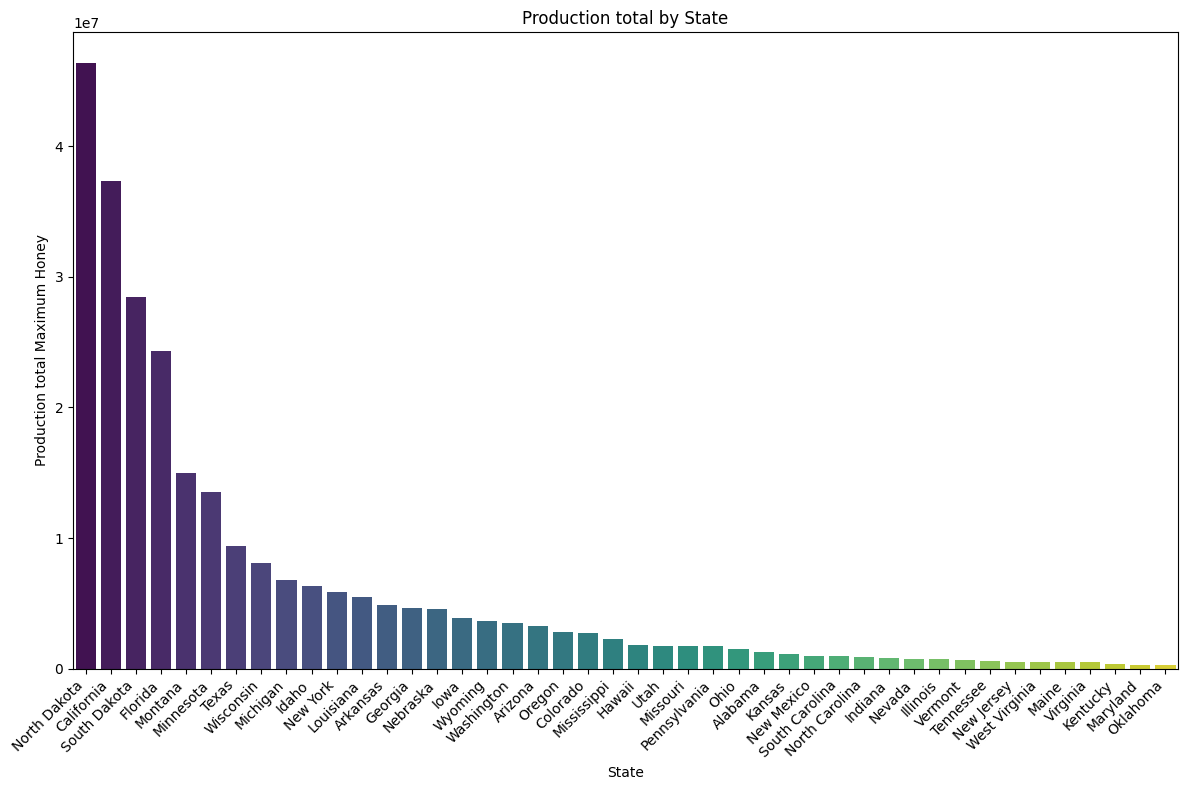

In [20]:
#Ahora observaremos las variables state y totalprod,en un grafica de barras.

# Calcular los valores máximos de cada variable por estado
max_values = df.groupby('state').agg({
    'numcol': 'max',
    'yieldpercol': 'max',
    'totalprod': 'max',
    'stocks': 'max',
    'priceperlb': 'max',
    'prodvalue': 'max'
})

# Ordenar los valores máximos de totalprod en orden descendente
max_values_sorted = max_values.sort_values(by='totalprod', ascending=False)

# Graficar los valores máximos
plt.figure(figsize=(12, 8))
sns.barplot(x=max_values_sorted.index, y='totalprod', data=max_values_sorted, palette='viridis')
plt.title('Production total by State')
plt.xlabel('State')
plt.ylabel('Production total Maximum Honey')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-19-c6a334172b47>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




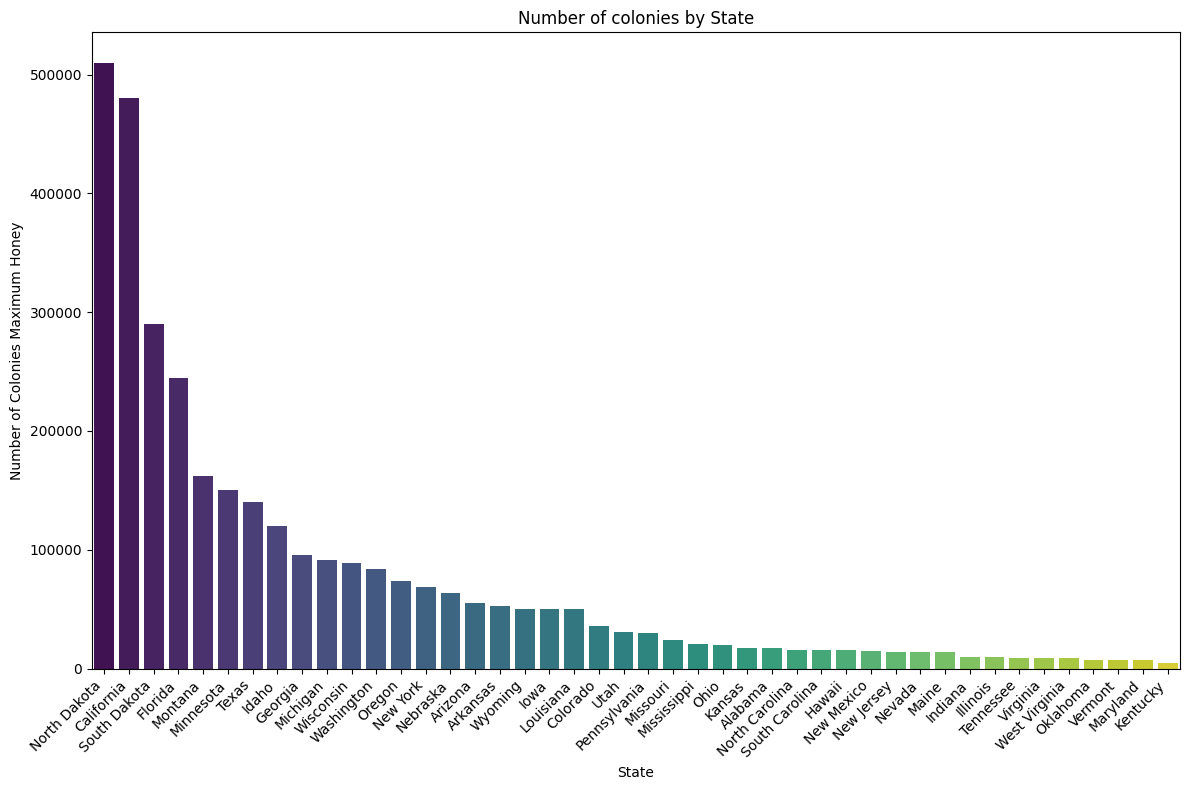

In [19]:
# Calcular los valores máximos de cada variable numcol por estado.
max_values = df.groupby('state').agg({
    'numcol': 'max',
    'yieldpercol': 'max',
    'totalprod': 'max',
    'stocks': 'max',
    'priceperlb': 'max',
    'prodvalue': 'max'
})

# Ordenar los valores máximos de totalprod en orden descendente
max_values_sorted = max_values.sort_values(by='numcol', ascending=False)

# Graficar los valores máximos
plt.figure(figsize=(12, 8))
sns.barplot(x=max_values_sorted.index, y='numcol', data=max_values_sorted, palette='viridis')
plt.title('Number of colonies by State')
plt.xlabel('State')
plt.ylabel('Number of Colonies Maximum Honey')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observamos en esta gráfica que los cinco primeros estados continúan liderando en producción, sin embargo, después de Minnesota, el número de colonias por estado difiere al compararlo con la primera gráfica, que muestra la producción

<ipython-input-22-507af38f3e25>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




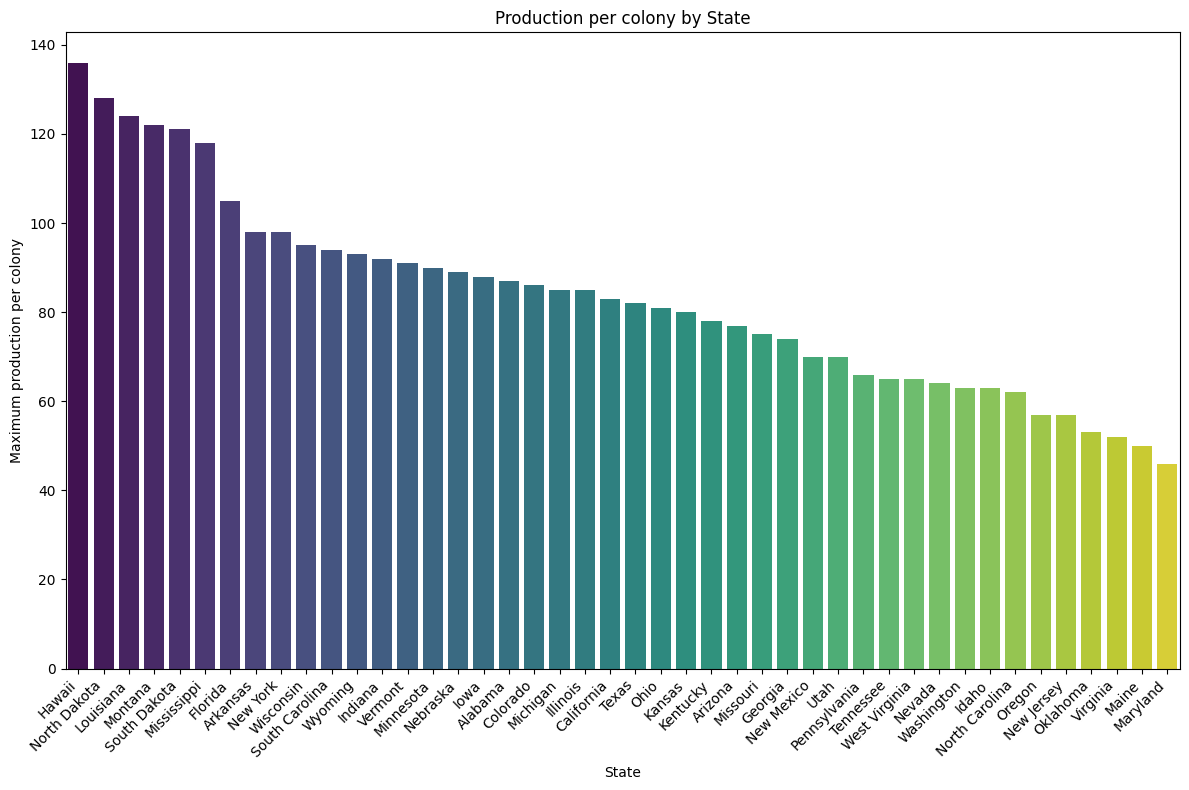

In [22]:

# Calcular los valores máximos dela variable yieldpercol(rendimiento por Colonia)
max_values = df.groupby('state').agg({
    'numcol': 'max',
    'yieldpercol': 'max',
    'totalprod': 'max',
    'stocks': 'max',
    'priceperlb': 'max',
    'prodvalue': 'max'
})

# Ordenar los valores máximos de totalprod en orden descendente
max_values_sorted = max_values.sort_values(by='yieldpercol', ascending=False)

# Graficar los valores máximos
plt.figure(figsize=(12, 8))
sns.barplot(x=max_values_sorted.index, y='yieldpercol', data=max_values_sorted, palette='viridis')
plt.title('Production per colony by State')
plt.xlabel('State')
plt.ylabel('Maximum production per colony')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-24-e49d028a2bcb>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




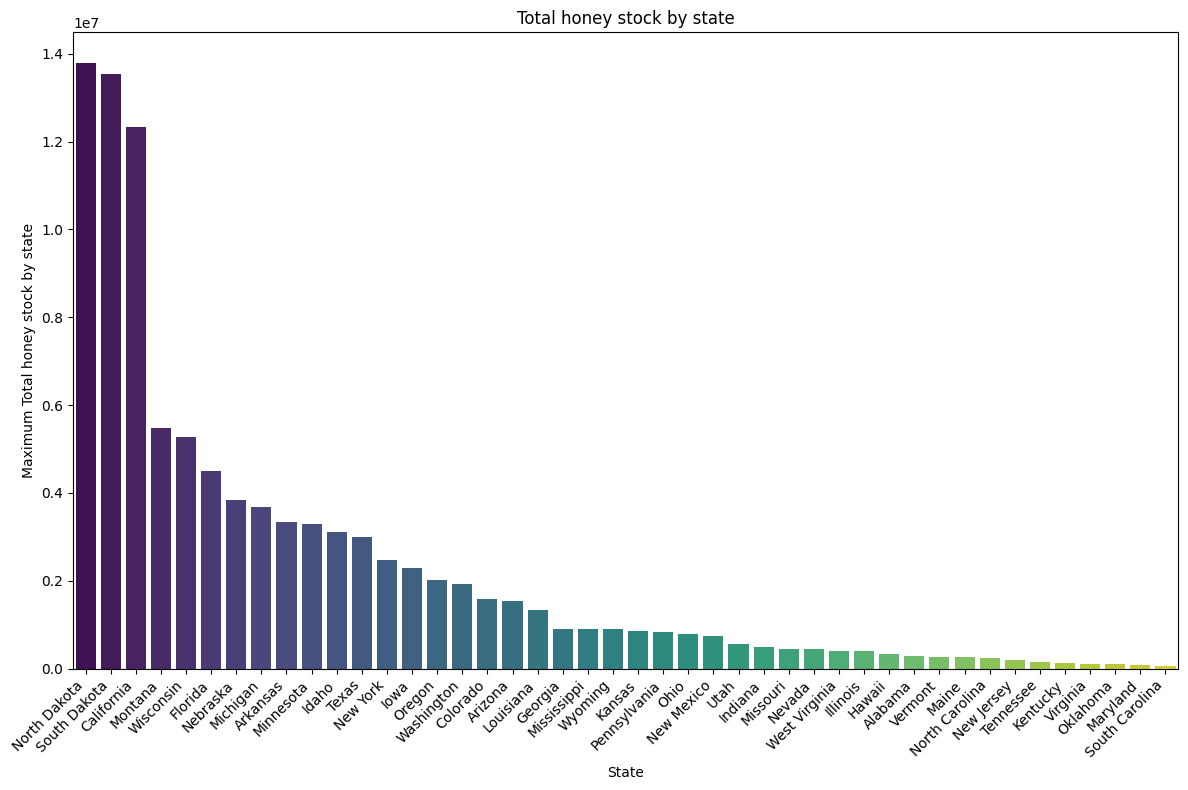

In [24]:

# Calcular los valores máximos de cada variable por estado
max_values = df.groupby('state').agg({
    'numcol': 'max',
    'yieldpercol': 'max',
    'totalprod': 'max',
    'stocks': 'max',
    'priceperlb': 'max',
    'prodvalue': 'max'
})

# Ordenar los valores máximos de totalprod en orden descendente
max_values_sorted = max_values.sort_values(by='stocks', ascending=False)

# Graficar los valores máximos
plt.figure(figsize=(12, 8))
sns.barplot(x=max_values_sorted.index, y='stocks', data=max_values_sorted, palette='viridis')
plt.title('Total honey stock by state')
plt.xlabel('State')
plt.ylabel('Maximum Total honey stock by state')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En esta gráfica, observamos el rendimiento promedio por colonia en términos de producción de miel y notamos que el orden de los estados cambia. Aún así, Dakota del Norte sigue ocupando el primer lugar, seguido por Dakota del Sur, California, Montana y Wisconsin.

<ipython-input-25-bb87592f4797>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




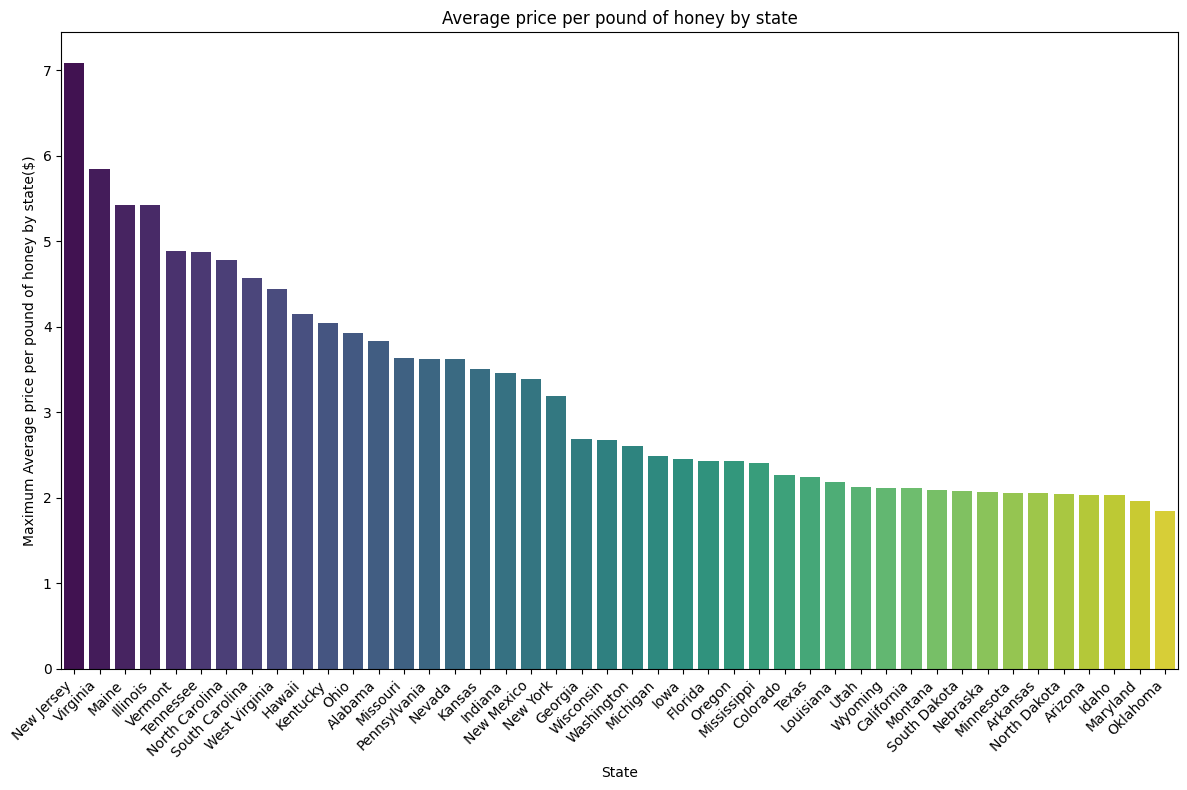

In [25]:
# Calcular los valores máximos  de la variable priceperlb
max_values = df.groupby('state').agg({
    'numcol': 'max',
    'yieldpercol': 'max',
    'totalprod': 'max',
    'stocks': 'max',
    'priceperlb': 'max',
    'prodvalue': 'max'
})

# Ordenar los valores máximos de totalprod en orden descendente
max_values_sorted = max_values.sort_values(by='priceperlb', ascending=False)

# Graficar los valores máximos
plt.figure(figsize=(12, 8))
sns.barplot(x=max_values_sorted.index, y='priceperlb', data=max_values_sorted, palette='viridis')
plt.title('Average price per pound of honey by state')
plt.xlabel('State')
plt.ylabel('Maximum Average price per pound of honey by state($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En este gráfico observamos cómo cambia el orden de los estados. Los estados que lideraban en las primeras gráficas ahora están al final, mientras que estados como New Jersey, Virginia, Maine e Illinois pasan a ocupar los primeros lugares en esta variable, el precio por libra de miel. Esto podría atribuirse a factores relacionados con el origen de la miel o las preferencias del consumidor.

In [26]:
#Observamos las variables y sus valores máximos según cada estado
# Calcular los valores máximos de cada variable por estado
max_values = df.groupby('state').agg({
    'numcol': 'max',
    'yieldpercol': 'max',
    'totalprod': 'max',
    'stocks': 'max',
    'priceperlb': 'max',
    'prodvalue': 'max'
})

# Ordenar los valores máximos de totalprod en orden descendente
max_values_sorted = max_values.sort_values(by='totalprod', ascending=False)

print(max_values_sorted)

                  numcol  yieldpercol   totalprod      stocks  priceperlb  \
state                                                                       
North Dakota    510000.0          128  46410000.0  13800000.0        2.04   
California      480000.0           83  37350000.0  12326000.0        2.11   
South Dakota    290000.0          121  28435000.0  13545000.0        2.08   
Florida         245000.0          105  24360000.0   4508000.0        2.43   
Montana         162000.0          122  14946000.0   5472000.0        2.09   
Minnesota       150000.0           90  13500000.0   3300000.0        2.06   
Texas           140000.0           82   9380000.0   2986000.0        2.24   
Wisconsin        89000.0           95   8099000.0   5264000.0        2.67   
Michigan         91000.0           85   6800000.0   3672000.0        2.49   
Idaho           120000.0           63   6300000.0   3110000.0        2.03   
New York         69000.0           98   5880000.0   2470000.0        3.19   

# Gráficos multivariados donde podremos observar el comportamiento de varias variables a lo largo del tiempo


In [27]:
#Produccion total por año de los 44 estados
import plotly.express as px

# Ordenar el DataFrame en orden descendente según la columna 'totalprod'
df_sorted = df.sort_values(by='totalprod', ascending=False)

# Crear el gráfico de líneas con los datos ordenados y agrupados por años
fig = px.bar(df_sorted, x='state', y='totalprod', facet_row='year',
              title='Producción Total por Año', height=2000)

# Mostrar el gráfico
fig.show()

In [30]:
#Produccion total por año de los 44 estados
import plotly.express as px

# Ordenar el DataFrame en orden descendente según la columna 'totalprod'
df_sorted = df.sort_values(by='priceperlb', ascending=False)

# Crear el gráfico de líneas con los datos ordenados y agrupados por años
fig = px.bar(df_sorted, x='state', y='priceperlb', facet_row='year',
              title='Precio Total de miel por Año', height=2000)

# Mostrar el gráfico
fig.show()

Debido a este gráfico, donde observamos la fluctuación del precio por libra en los estados durante el tiempo evaluado, notamos que en estados como South Carolina, New Mexico, Nevada, Maryland y Oklahoma, se observa una caída muy pronunciada en el valor de la miel por libra. Por ello, voy a realizar una visualización gráfica que muestre las fluctuaciones del precio por libra a lo largo de los años para el estado de South Carolina.

In [35]:
import plotly.express as px


# Filtrar el DataFrame para incluir solo los datos de South Carolina
df_sc = df[df['state'] == 'South Carolina']

# Crear el gráfico de barras con los datos de South Carolina
fig = px.bar(df_sc, x='year', y='priceperlb', title='Precio Promedio por Libra de Miel en South Carolina por Año',
             labels={'year': 'Año', 'priceperlb': 'Precio Promedio por Libra'})

# Mostrar el gráfico
fig.show()

In [38]:
# Filtrar el DataFrame para incluir solo los datos de South Carolina
df_sc = df[df['state'] == 'South Carolina']

# Ordenar el DataFrame por una columna específica en orden ascendente
columna_de_interes = 'priceperlb'
df_sc_sorted = df_sc.sort_values(by=columna_de_interes, ascending=True)

# Ver los primeros valores (los más bajos) de la columna de interés
print("Los valores más bajos de South Carolina en la columna '{}':".format(columna_de_interes))
print(df_sc_sorted.head())

Los valores más bajos de South Carolina en la columna 'priceperlb':
              state   numcol  yieldpercol  totalprod   stocks  priceperlb  \
162  South Carolina   7000.0           40   280000.0  67000.0        0.79   
206  South Carolina   5000.0           94   470000.0  14000.0        1.25   
250  South Carolina   4000.0           70   280000.0   8000.0        1.89   
694  South Carolina   9000.0           54   486000.0  19000.0        3.97   
734  South Carolina  14000.0           67   938000.0  38000.0        4.10   

     prodvalue  year  
162   221000.0  2001  
206   588000.0  2002  
250   529000.0  2003  
694  1929000.0  2014  
734  3846000.0  2015  


De acuerdo a esta gráfica y a la última línea de código donde imprimimos los valores más bajos de la variable 'priceperlben' en South Carolina, esto podría deberse a años atípicos influenciados por factores climáticos o económicos que reflejan la baja producción de miel y ventas.

<ipython-input-28-86d82f8aaa01>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




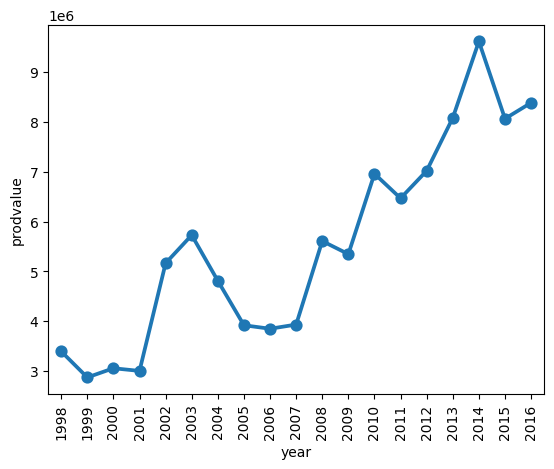

In [ ]:
sns.pointplot(x="year", y="prodvalue", data=df, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Se trata de una tendencia interesante. A medida que la producción total ha disminuido a lo largo de los años, el valor de la producción por libra ha aumentado con el tiempo. Al disminuir la oferta, la demanda ha aumentado el valor de la miel.

Comprobemos cuáles son los estados que han aprovechado esta tendencia. Podemos comparar la producción total con las existencias de los productores.

<ipython-input-54-431b7836f65d>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-54-431b7836f65d>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




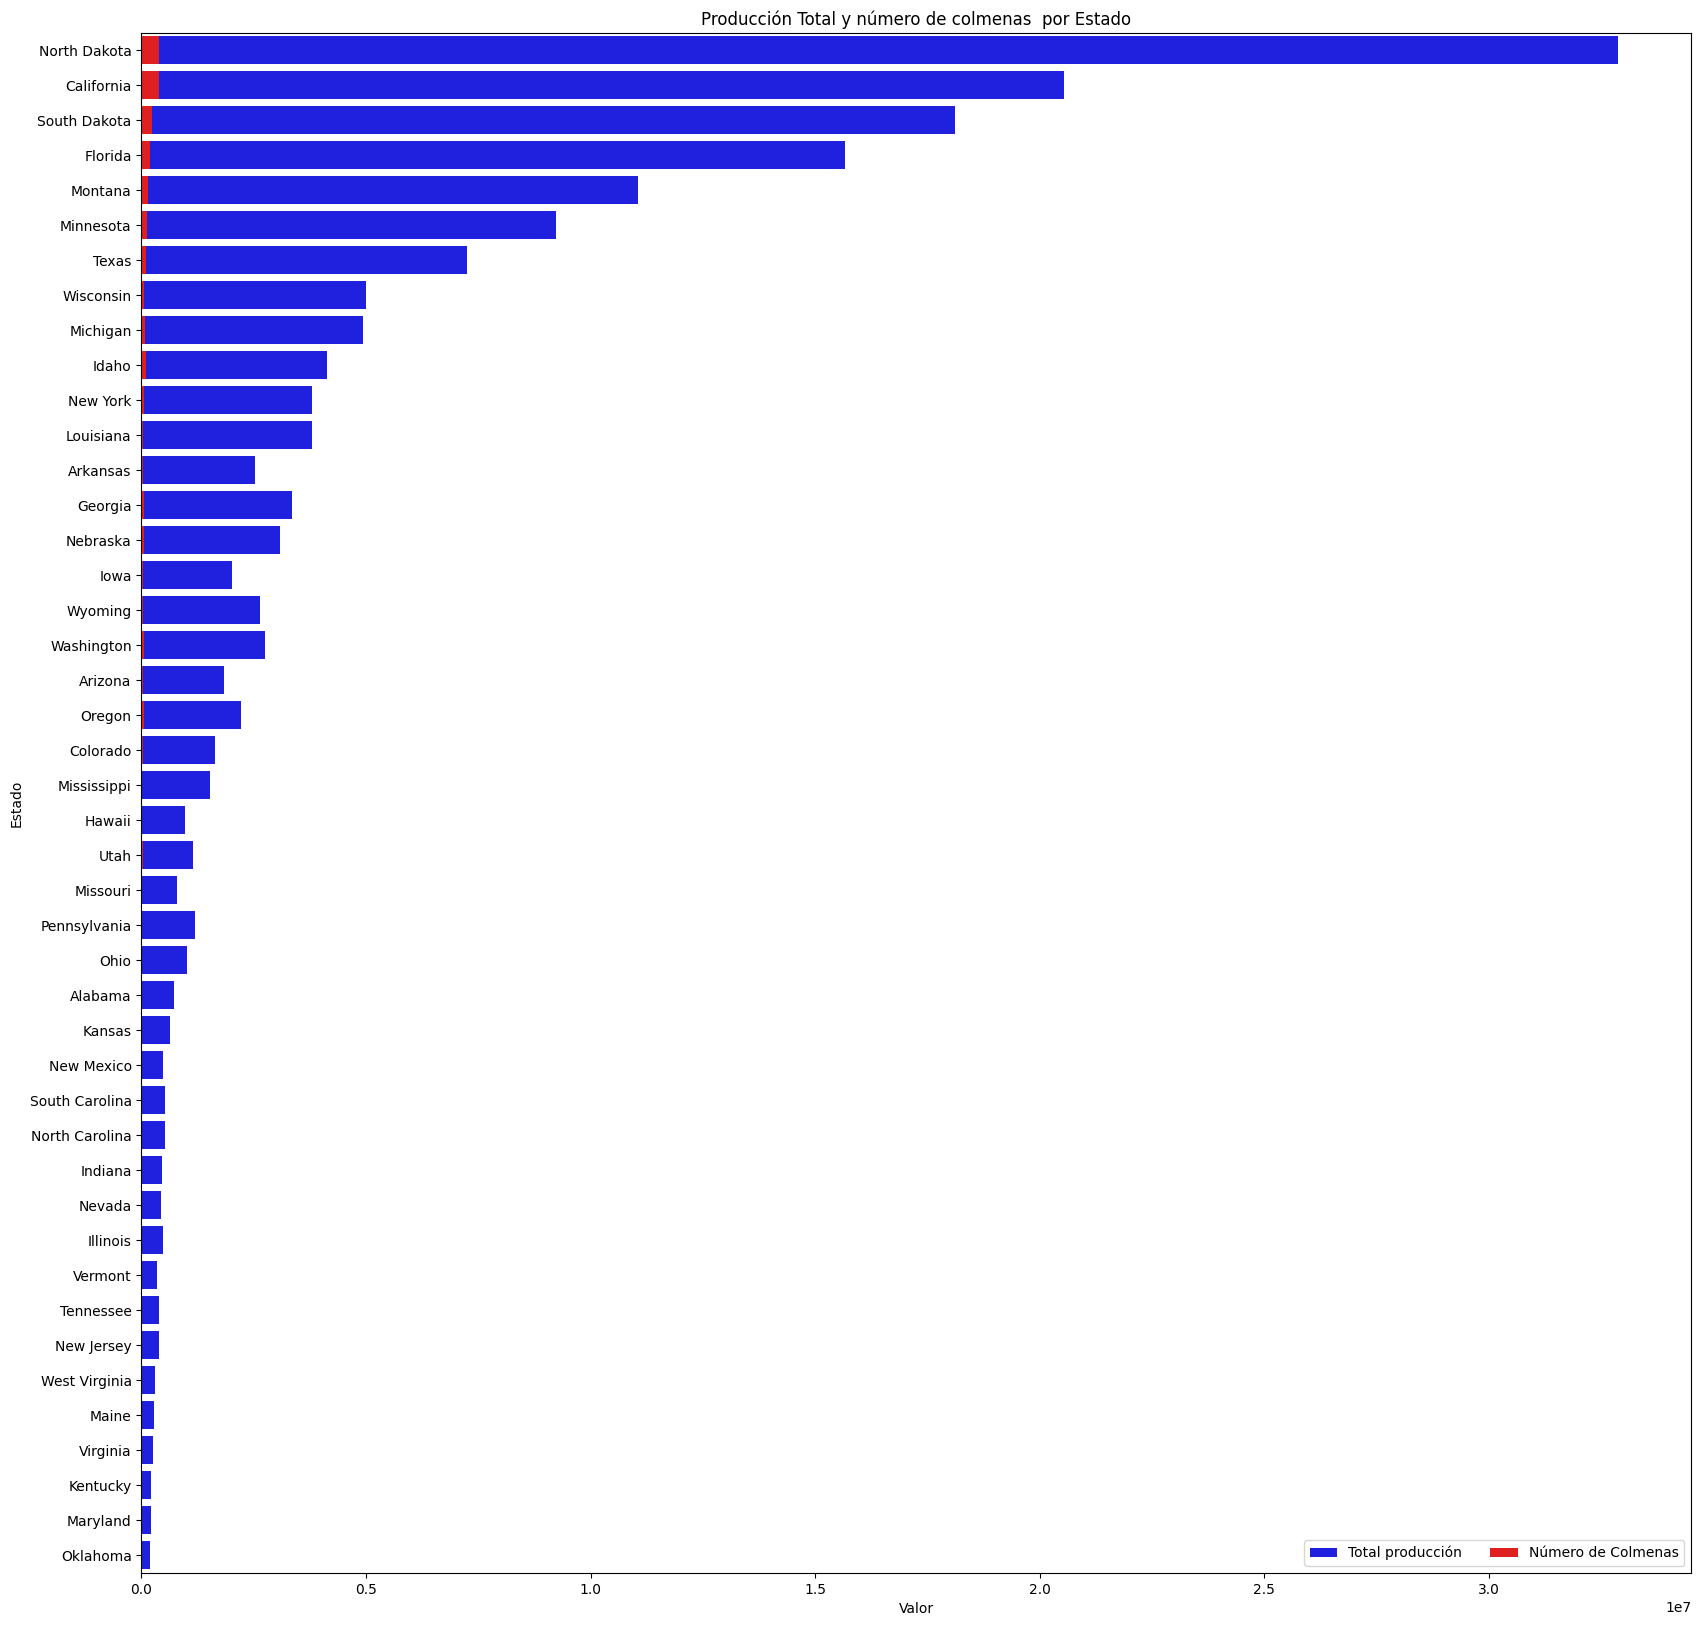

In [54]:

plt.figure(figsize=(20, 20))  # Tamaño del plot

# Produccion total por estado
sns.barplot(x="totalprod", y="state", data=df.sort_values("totalprod", ascending=False),
            label="Total producción", color="b", ci=None)

# Plot precio libra por estado
sns.barplot(x="numcol", y="state", data=df.sort_values("totalprod", ascending=False),
            label="Número de Colmenas", color="r", ci=None)

# Leyenda
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.title("Producción Total y número de colmenas  por Estado")
plt.xlabel("Valor")
plt.ylabel("Estado")
plt.show()

Observaciones:
"Dakota del Norte ha conseguido vender más miel que Dakota del Sur a pesar de tener el mayor valor de producción."
"Florida tiene la mayor eficiencia entre los principales estados productores de miel."
"Michigan es más eficiente que Wisconsin en la venta de miel."

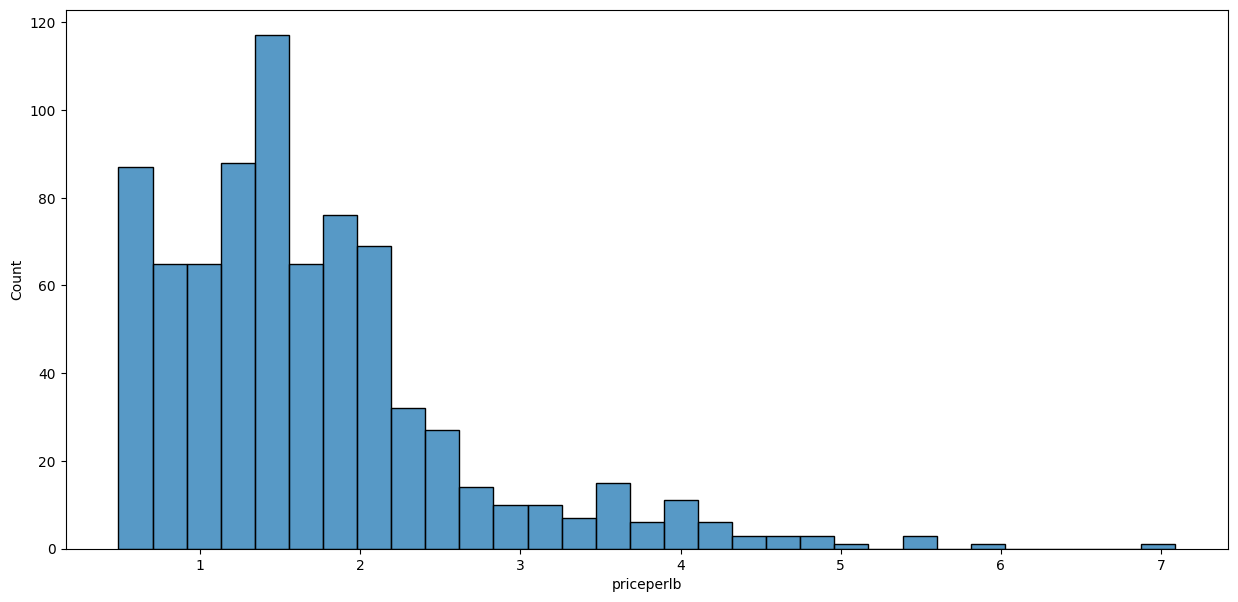

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(df.priceperlb)
plt.show()

El precio por libra de miel tiene una distribución sesgada hacia la derecha, con muchos valores atípicos en el extremo superior. La mediana del precio por libra de miel es de 1,5 dolares.

Ahora, veamos el precio promedio por libra de miel en los distintos estados.

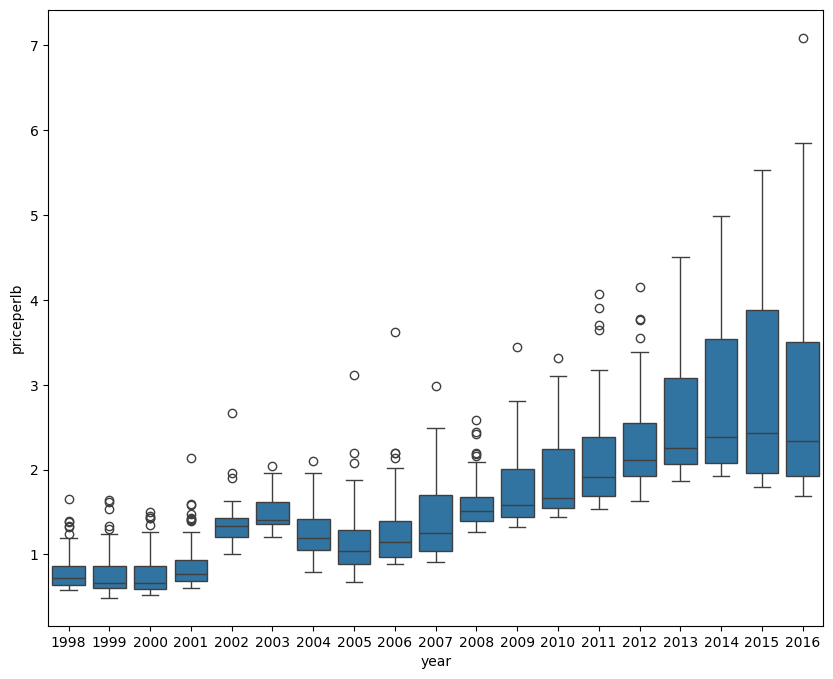

In [ ]:
fig, a1 = plt.subplots(1,figsize=(10,8))
sns.boxplot(data = df, x = 'year', y = 'priceperlb')
plt.show()

**Observaciones del Analisis Exploratorio de Datos**
Podemos concluir que la producción total de miel ha disminuido a lo largo de los años, mientras que el valor de la producción por libra ha aumentado. La razón del descenso en la producción de miel es la disminución del rendimiento por colonia a lo largo de los años. Los principales estados productores de miel son California, Florida, Dakota del Norte, Dakota del Sur y Montana. Entre ellos, Florida ha sido muy eficiente en la venta de miel.


### Feature Engineering **
Revisaremos los datos y los limpiaremos para trabajar con Machine Learning. El Feature Engineering es el proceso de seleccionar, modificar y crear variables/características de un conjunto de datos para mejorar su análisis y rendimiento en cualquier modelo que queramos aplicar, principalmente en Machine Learning

1.Valores duplicados

In [55]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
780    False
781    False
782    False
783    False
784    False
Length: 785, dtype: bool

Podemos Notar que no tenemos ningun valor  duplicado.

**Tratamiento de valores nulos**

In [56]:
# Eliminar filas que contienen al menos un valor nulo
df_sin_nulos = df.dropna()

# Eliminar columnas que contienen al menos un valor nulo
df_sin_nulos_columnas = df.dropna(axis=1)

In [ ]:
df_sin_nulos.shape

(785, 8)

In [57]:
df_sin_nulos

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
780,Virginia,5000.0,38,190000.0,30000.0,5.85,1112000.0,2016
781,Washington,84000.0,35,2940000.0,412000.0,1.99,5851000.0,2016
782,West Virginia,5000.0,32,160000.0,43000.0,3.92,627000.0,2016
783,Wisconsin,54000.0,62,3348000.0,1205000.0,2.67,8939000.0,2016


*Limpieza de outliers*

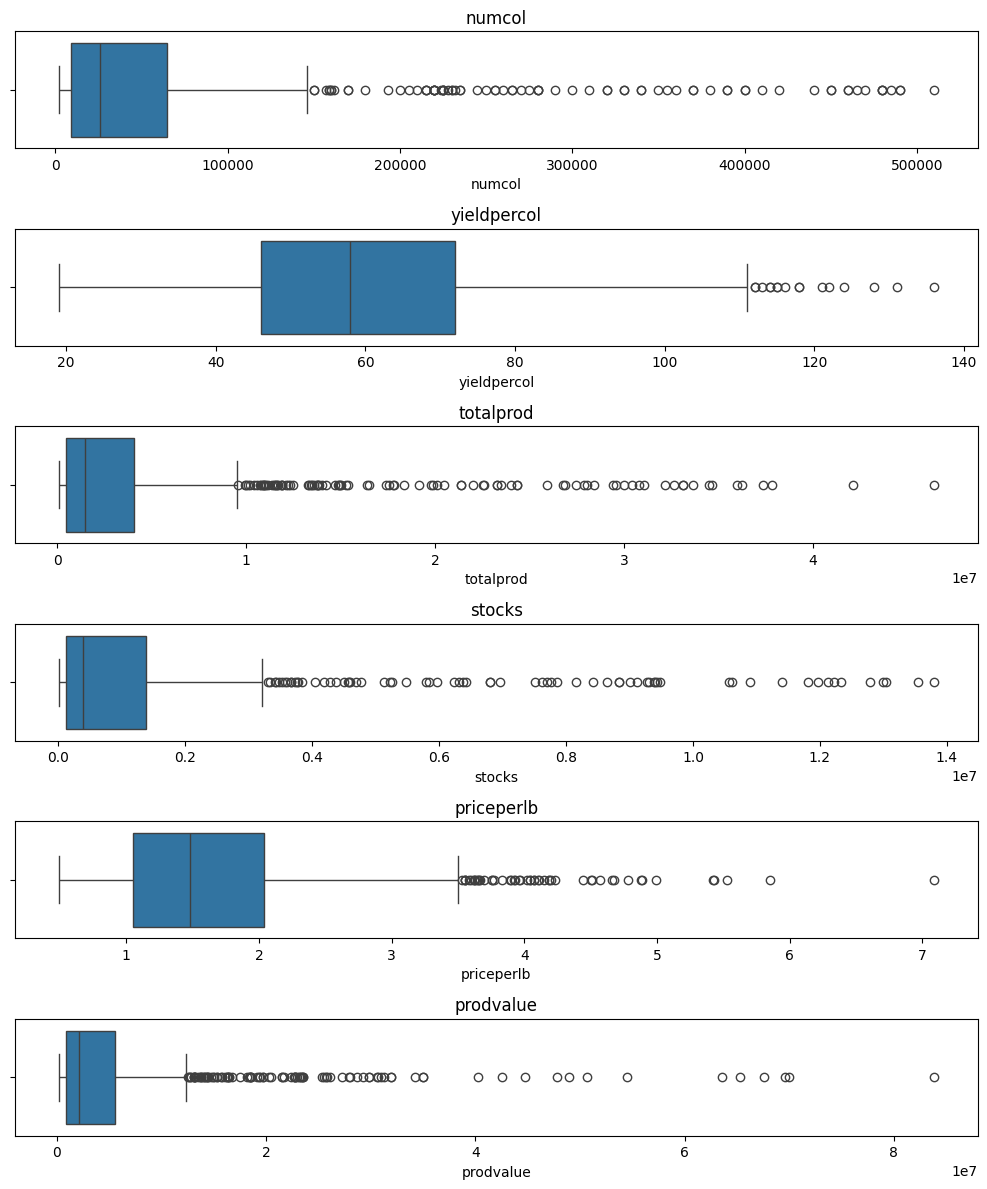

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Excluir la variable 'años' si está presente en el DataFrame
if 'year' in df.columns:
    num_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['year']).columns
else:
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [59]:
# Lista de columnas con outliers
columns_with_outliers = ['numcol', 'yieldpercol', 'totalprod', 'stocks',
                          'priceperlb','prodvalue']

# Definir una función para eliminar outliers basados en el IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Eliminar outliers en las columnas especificadas
for col in columns_with_outliers:
    df = remove_outliers(df, col)

# Ahora df no tiene outliers en las columnas especificadas

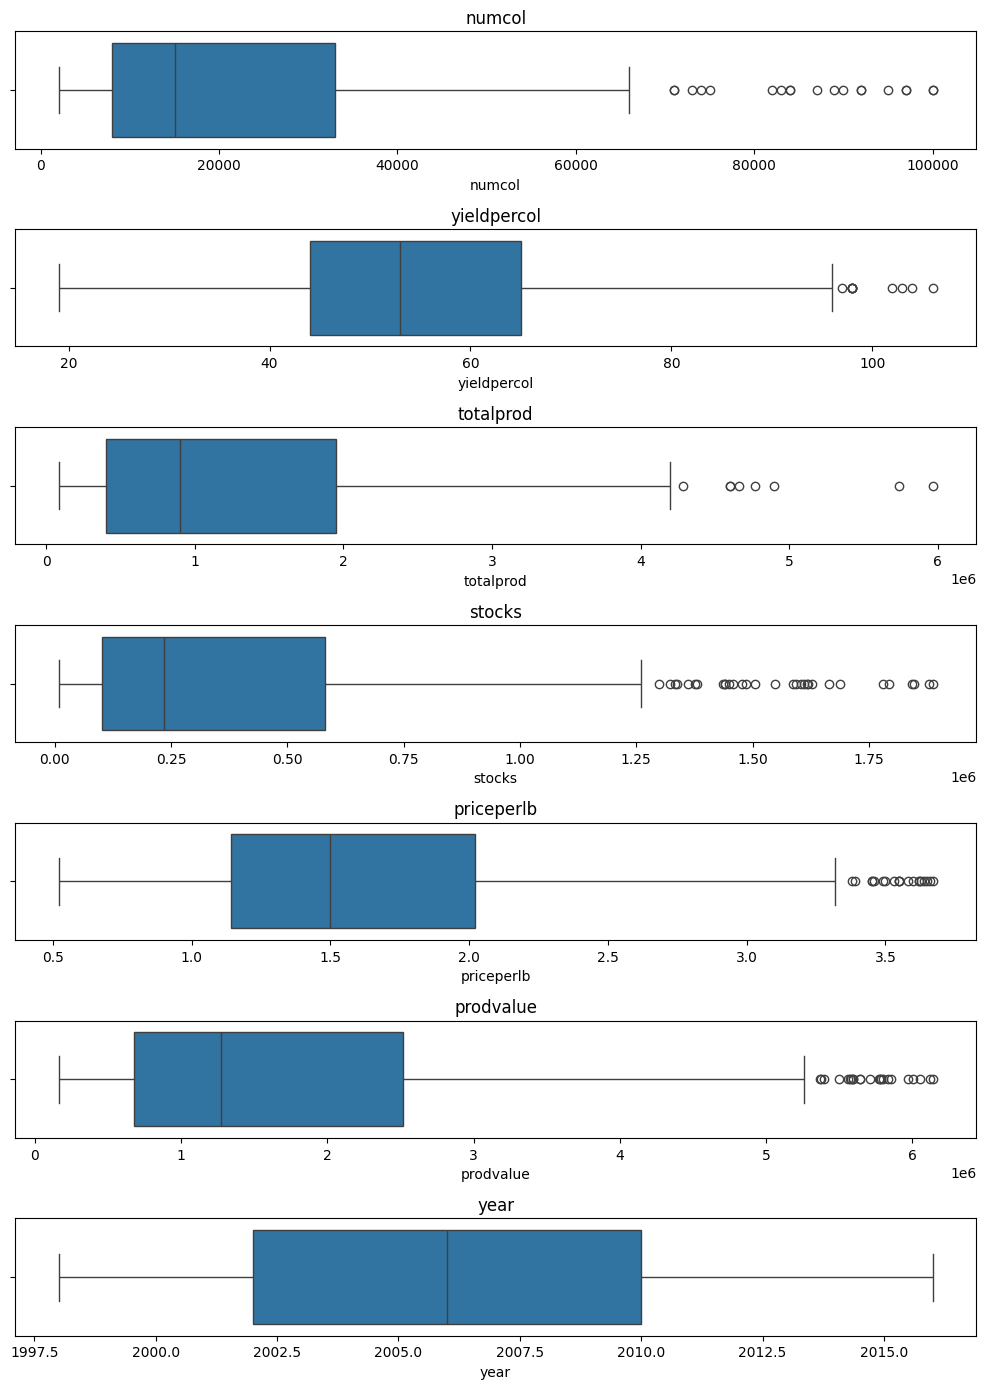

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Excluir la variable 'año' si está presente en el DataFrame
if 'año' in df.columns:
    num_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['año']).columns
else:
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [64]:
#Miremos el tamaño del dataframe ,despues de limpiar los valores extremos
df.shape

(521, 8)

In [65]:
#Con la función describe() de pandas ,puede ver el resumen estadistico de las columnas numericas del dataframe

df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,521.000000,521.000000,5.210000e+02,5.210000e+02,521.000000,5.210000e+02,521.000000
mean,23182.341651,55.879079,1.284159e+06,4.131132e+05,1.631516,1.797225e+06,2006.234165
std,20116.089883,16.373018,1.094879e+06,4.285452e+05,0.723198,1.458020e+06,5.110967
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.520000,1.620000e+05,1998.000000
25%,8000.000000,44.000000,4.050000e+05,1.010000e+05,1.140000,6.760000e+05,2002.000000
50%,15000.000000,53.000000,9.010000e+05,2.350000e+05,1.500000,1.276000e+06,2006.000000
75%,33000.000000,65.000000,1.950000e+06,5.800000e+05,2.020000,2.517000e+06,2010.000000
max,100000.000000,106.000000,5.964000e+06,1.887000e+06,3.670000,6.138000e+06,2016.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 521 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        521 non-null    object 
 1   numcol       521 non-null    float64
 2   yieldpercol  521 non-null    int64  
 3   totalprod    521 non-null    float64
 4   stocks       521 non-null    float64
 5   priceperlb   521 non-null    float64
 6   prodvalue    521 non-null    float64
 7   year         521 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 36.6+ KB


Debido a que las variables del DataFrame estudiado muestran cambios que pueden obedecer a diferentes factores, entre ellos factores climáticos, he decidido anexar un DataFrame de la variable 'Maximum Average Annual Temperature' (°C) en un periodo de tiempo (1998-2016) de Estados Unidos.
Fuente: https://www.statista.com/statistics/1038598/annual-average-maximum-temperature-in-the-us-celsius/

In [67]:
# Lee el archivo XLSX
# Subir el nuevo DataFrame
temp_data= pd.read_excel('/content/drive/MyDrive/DS/Maximum average annual temperature.xlsx')

# Visualiza las primeras filas del DataFrame
print(temp_data.head())

   year  maxi_ average_annual_temperature(°C)
0  1998                                 18.68
1  1999                                 19.00
2  2000                                 18.51
3  2001                                 18.69
4  2002                                 18.44


In [68]:

# Fusionar los datos de temperatura con el DataFrame Honey production
df_merged = df.merge(temp_data, how='left', on='year')

# Verificar que la fusión haya sido exitosa
print(df_merged.head())


      state   numcol  yieldpercol  totalprod     stocks  priceperlb  \
0   Alabama  16000.0           71  1136000.0   159000.0        0.72   
1   Arizona  55000.0           60  3300000.0  1485000.0        0.64   
2  Arkansas  53000.0           65  3445000.0  1688000.0        0.59   
3  Colorado  27000.0           72  1944000.0  1594000.0        0.70   
4   Georgia  75000.0           56  4200000.0   307000.0        0.69   

   prodvalue  year  maxi_ average_annual_temperature(°C)  
0   818000.0  1998                                 18.68  
1  2112000.0  1998                                 18.68  
2  2033000.0  1998                                 18.68  
3  1361000.0  1998                                 18.68  
4  2898000.0  1998                                 18.68  


In [70]:
#Shape función que permite ver el tamaño del DateFrame
df_merged.shape

(521, 9)

In [71]:
# Verificar los nombres de las columnas en tus datos
print(df_merged.columns)

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year', 'maxi_ average_annual_temperature(°C)'],
      dtype='object')


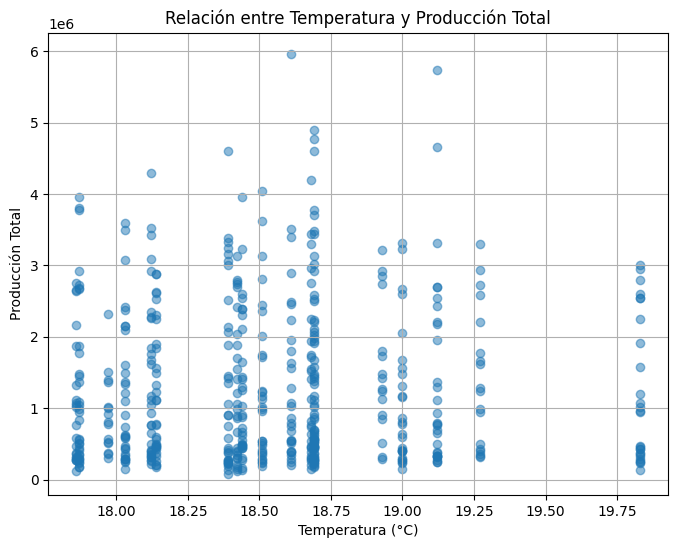

In [72]:
# Crear la gráfica de dispersión ,busquemos relacionar las variables temperatura y total de producción.
plt.figure(figsize=(8, 6))
plt.scatter(df_merged['maxi_ average_annual_temperature(°C)'], df_merged['totalprod'], alpha=0.5)

# Añadir etiquetas y título
plt.title('Relación entre Temperatura y Producción Total')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Producción Total')

# Mostrar la gráfica
plt.grid(True)
plt.show()

In [73]:
# Calcular la temperatura promedio por año
temperatura_por_año = df_merged.groupby('year')['maxi_ average_annual_temperature(°C)'].mean()

# Mostrar la temperatura promedio por año
print(temperatura_por_año)

year
1998    18.68
1999    19.00
2000    18.51
2001    18.69
2002    18.44
2003    18.39
2004    18.12
2005    18.61
2006    19.12
2007    18.69
2008    18.03
2009    17.87
2010    18.14
2011    18.42
2012    19.83
2013    17.86
2014    17.97
2015    18.93
2016    19.27
Name: maxi_ average_annual_temperature(°C), dtype: float64


In [74]:
# Calcular la producción total de miel por año
produccion_por_año = df_merged.groupby('year')['totalprod'].sum()

# Encontrar el año con la mayor producción
año_max_produccion = produccion_por_año.idxmax()
max_produccion = produccion_por_año.max()

# Mostrar el año con la mayor producción
print("El año con la mayor producción de miel fue:", año_max_produccion)
print("Producción total en ese año:", max_produccion)

El año con la mayor producción de miel fue: 2001
Producción total en ese año: 51076000.0


In [75]:
# Calcular la producción total de miel por año
produccion_por_año = df_merged.groupby('year')['totalprod'].sum()

# Encontrar el año con la menor producción
año_min_produccion = produccion_por_año.idxmin()
min_produccion = produccion_por_año.min()

# Mostrar el año con la menor producción
print("El año con la menor producción de miel fue:", año_min_produccion)
print("Producción total en ese año:", min_produccion)

El año con la menor producción de miel fue: 2014
Producción total en ese año: 13751000.0


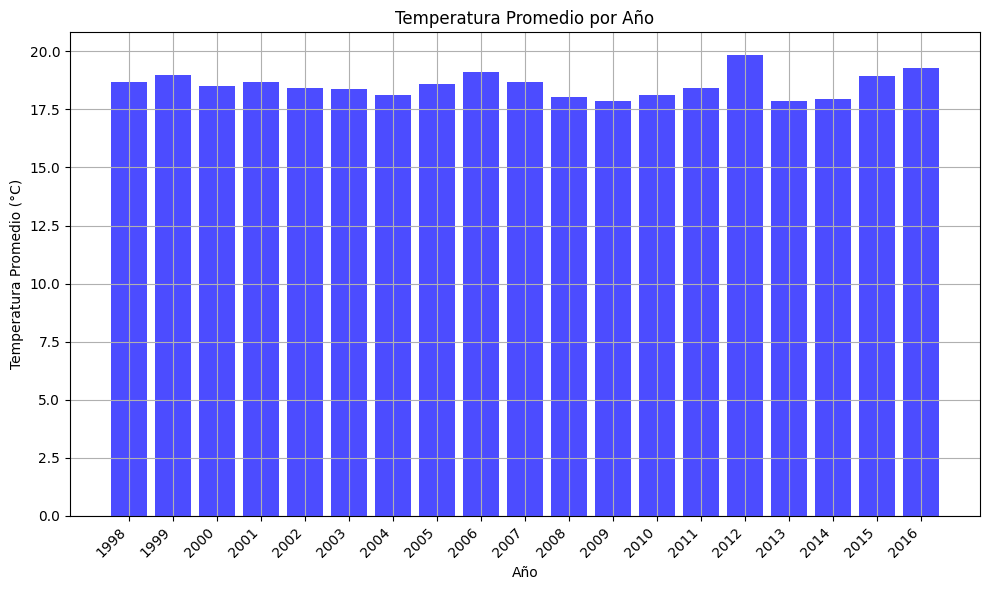

In [76]:
# Calcular la temperatura promedio por año
temperatura_por_año = df_merged.groupby('year')['maxi_ average_annual_temperature(°C)'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(temperatura_por_año.index.astype(str), temperatura_por_año.values, color='blue', alpha=0.7)

# Añadir etiquetas y título
plt.title('Temperatura Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Temperatura Promedio (°C)')

# Establecer las etiquetas del eje x como texto
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

Exploraremos las correlaciones de las variables del nuevo DataFrame df_merged.

In [77]:
# Eliminar columnas no numéricas
df_numeric = df_merged.drop(columns=['state'])

# Calcular la matriz de correlación
correlation = df_numeric.corr()

# Mostrar la matriz de correlación
print(correlation)

                                        numcol  yieldpercol  totalprod  \
numcol                                1.000000    -0.034218   0.896898   
yieldpercol                          -0.034218     1.000000   0.314917   
totalprod                             0.896898     0.314917   1.000000   
stocks                                0.749176     0.156104   0.764020   
priceperlb                           -0.276585    -0.277417  -0.376972   
prodvalue                             0.827864     0.145889   0.821601   
year                                  0.092434    -0.183117  -0.019572   
maxi_ average_annual_temperature(°C)  0.043546     0.022748   0.038021   

                                        stocks  priceperlb  prodvalue  \
numcol                                0.749176   -0.276585   0.827864   
yieldpercol                           0.156104   -0.277417   0.145889   
totalprod                             0.764020   -0.376972   0.821601   
stocks                                1.0

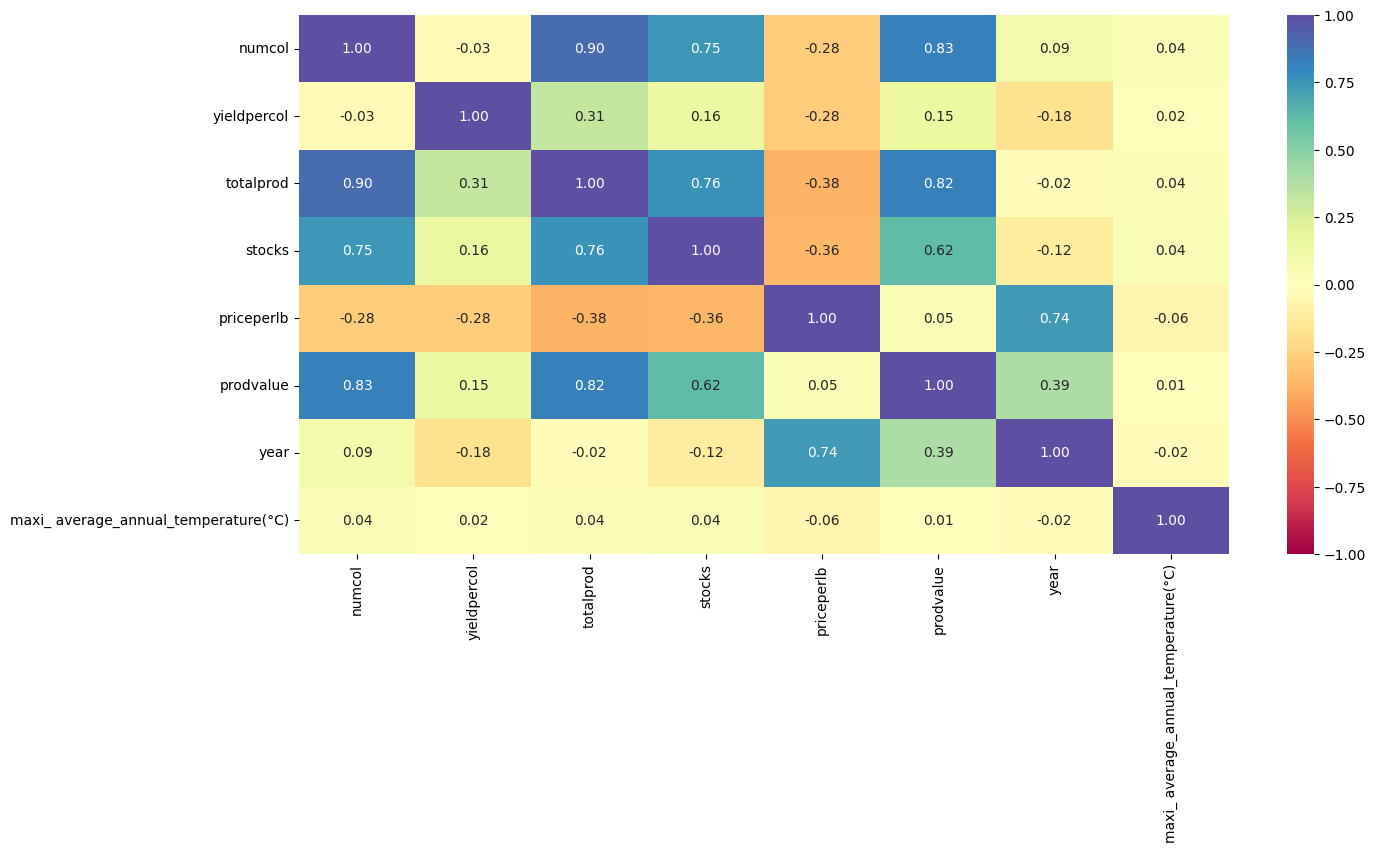

In [78]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observamos que las variables que tienen las correlaciones más altas son:

**totalprod y numcol** : Tienen una correlación positiva bastante alta de 0.896898. Esto sugiere que hay una fuerte relación entre el número de colonias de abejas y la producción total de miel.

**totalprod y stocks:** También muestran una correlación positiva significativa de 0.764020. Esto indica que la producción total de miel está relacionada de manera considerable con las existencias de miel.

**numcol y stocks**: Tienen una correlación positiva de 0.749176. Esto sugiere que el número de colonias de abejas está relacionado con las existencias de miel, aunque ligeramente menos fuerte que con la producción total.

Estas correlaciones positivas indican que hay una relación directa entre estas variables: cuando una aumenta, la otra tiende a aumentar también.

Creación de variables a partir del nuevo DataFrame. No tendremos en cuenta la variable de 'Máximo de temperatura anual', ya que no presenta correlación positiva con ninguna de las otras variables.

In [79]:
# Índice de producción: producción total / (numcol * priceperlb)
df_merged['production_index'] = df_merged['totalprod'] / (df_merged['numcol'] * df_merged['priceperlb'])

# Rendimiento por colonia: totalprod / (numcol * yieldpercol)
df_merged['colony_yield'] = df_merged['totalprod'] / (df_merged['numcol'] * df_merged['yieldpercol'])

# Precio total de la producción: totalprod * priceperlb
df_merged['total_production_price'] = df_merged['totalprod'] * df_merged['priceperlb']

# Producción por año: totalprod agrupado por año
production_per_year = df_merged.groupby('year')['totalprod'].sum().reset_index()
production_per_year.columns = ['year', 'production_per_year']
df_merged = pd.merge(df_merged, production_per_year, on='year')

# Valor total de la producción: totalprod * priceperlb
df_merged['total_production_value'] = df_merged['totalprod'] * df_merged['priceperlb']

# Producción por colonia: totalprod / numcol
df_merged['production_per_colony'] = df_merged['totalprod'] /df_merged['numcol']

# Mostrar el DataFrame resultante
print(df_merged)

            state   numcol  yieldpercol  totalprod     stocks  priceperlb  \
0         Alabama  16000.0           71  1136000.0   159000.0        0.72   
1         Arizona  55000.0           60  3300000.0  1485000.0        0.64   
2        Arkansas  53000.0           65  3445000.0  1688000.0        0.59   
3        Colorado  27000.0           72  1944000.0  1594000.0        0.70   
4         Georgia  75000.0           56  4200000.0   307000.0        0.69   
..            ...      ...          ...        ...        ...         ...   
516  Pennsylvania  19000.0           50   950000.0   266000.0        3.03   
517          Utah  31000.0           32   992000.0   169000.0        1.93   
518       Vermont   6000.0           52   312000.0    69000.0        3.64   
519    Washington  84000.0           35  2940000.0   412000.0        1.99   
520       Wyoming  40000.0           68  2720000.0   190000.0        1.78   

     prodvalue  year  maxi_ average_annual_temperature(°C)  production_inde

In [80]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   state                                 521 non-null    object 
 1   numcol                                521 non-null    float64
 2   yieldpercol                           521 non-null    int64  
 3   totalprod                             521 non-null    float64
 4   stocks                                521 non-null    float64
 5   priceperlb                            521 non-null    float64
 6   prodvalue                             521 non-null    float64
 7   year                                  521 non-null    int64  
 8   maxi_ average_annual_temperature(°C)  521 non-null    float64
 9   production_index                      521 non-null    float64
 10  colony_yield                          521 non-null    float64
 11  total_production_pr

Realizaremos graficos para observar como es comportamiento de estas variables nuevas.

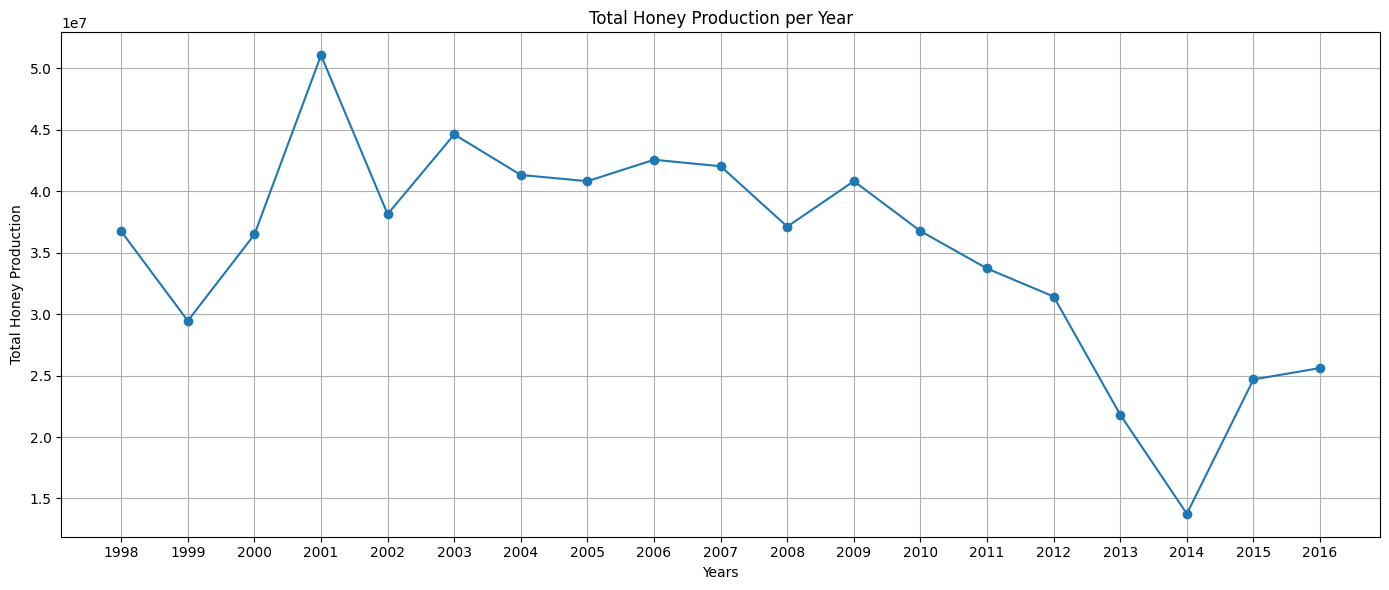

In [81]:
# Agrupar la producción total por año
production_per_year = df_merged.groupby('year')['totalprod'].sum().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(14, 6))  # Ajusta el tamaño de la figura para que quepan todos los años
plt.plot(production_per_year['year'], production_per_year['totalprod'], marker='o', linestyle='-')
plt.title('Total Honey Production per Year')
plt.xlabel('Years')
plt.ylabel('Total Honey Production')
plt.grid(True)
plt.xticks(production_per_year['year'])  # Mostrar todos los años en el eje x
plt.tight_layout()  # Ajusta el diseño para evitar que los años se solapen
plt.show()

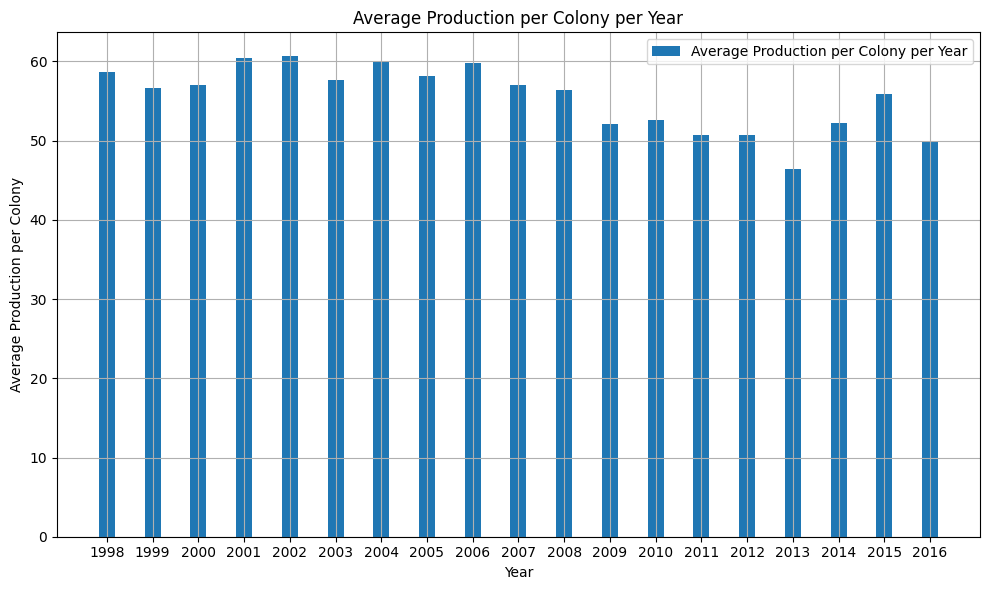

In [83]:

# Agrupar la producción por colonia por año y calcular la producción promedio por colonia para cada año
production_per_colony_per_year = df_merged.groupby('year')['production_per_colony'].mean().reset_index()

# Obtener la lista de años y la lista de producción promedio por colonia para cada año
years = production_per_colony_per_year['year']
production_per_colony = production_per_colony_per_year['production_per_colony']

# Configurar el ancho de las barras
bar_width = 0.35

# Definir la posición de las barras en el eje x
index = np.arange(len(years))

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
plt.bar(index, production_per_colony, bar_width, label='Average Production per Colony per Year')

# Configurar las etiquetas en el eje x
plt.xlabel('Year')
plt.ylabel('Average Production per Colony')
plt.title('Average Production per Colony per Year')
plt.xticks(index, years)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

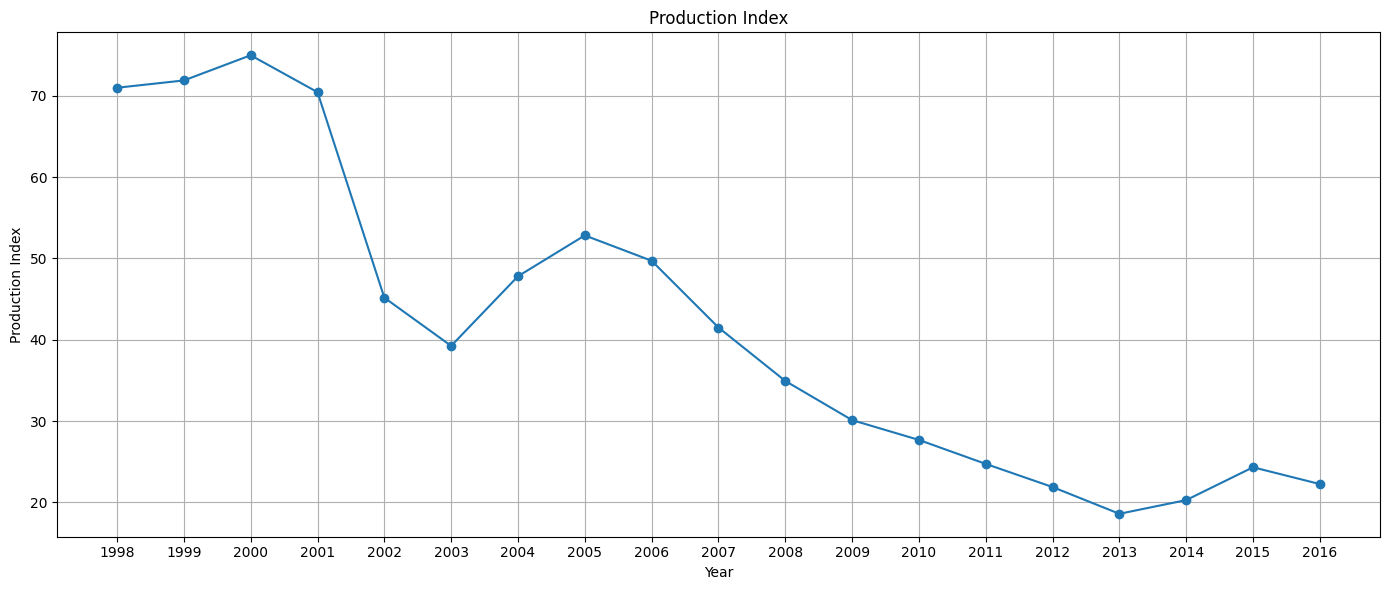

In [84]:
df_merged['production_index'] = df_merged['totalprod'] / (df_merged['numcol'] * df_merged['priceperlb'])

# Agrupar el índice de producción por año
production_index_per_year = df_merged.groupby('year')['production_index'].mean().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(14, 6))  # Ajusta el tamaño de la figura para que quepan todos los años
plt.plot(production_index_per_year['year'], production_index_per_year['production_index'], marker='o', linestyle='-')
plt.title('Production Index')
plt.xlabel('Year')
plt.ylabel('Production Index')
plt.grid(True)
plt.xticks(production_index_per_year['year'])  # Mostrar todos los años en el eje x
plt.tight_layout()  # Ajusta el diseño para evitar que los años se solapen
plt.show()

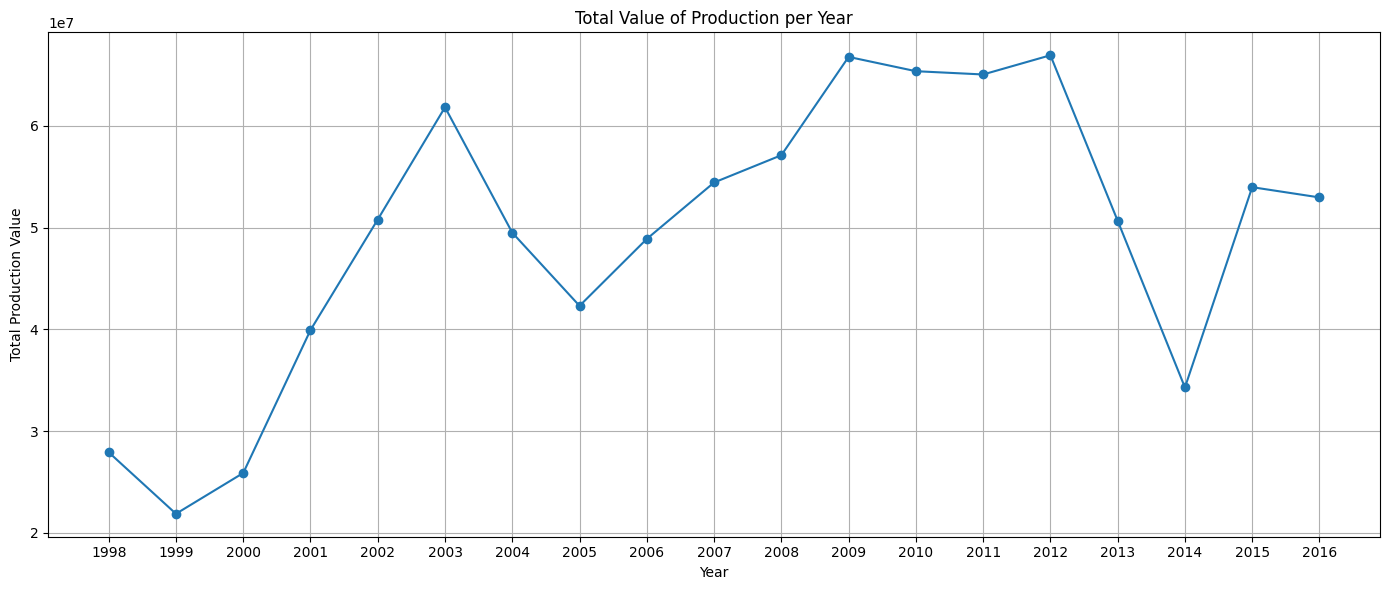

In [85]:
import matplotlib.pyplot as plt

# Calcular el valor total de la producción por año
df_merged['total_production_value'] = df_merged['totalprod'] * df_merged['priceperlb']

# Agrupar el valor total de la producción por año
production_value_per_year = df_merged.groupby('year')['total_production_value'].sum().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(14, 6))  # Ajusta el tamaño de la figura para que quepan todos los años
plt.plot(production_value_per_year['year'], production_value_per_year['total_production_value'], marker='o', linestyle='-')
plt.title('Total Value of Production per Year')
plt.xlabel('Year')
plt.ylabel('Total Production Value')
plt.grid(True)
plt.xticks(production_value_per_year['year'])  # Mostrar todos los años en el eje x
plt.tight_layout()  # Ajusta el diseño para evitar que los años se solapen
plt.show()

In [86]:

df_merged.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,maxi_ average_annual_temperature(°C),production_index,colony_yield,total_production_price,production_per_year,total_production_value,production_per_colony
count,521.000000,521.000000,5.210000e+02,5.210000e+02,521.000000,5.210000e+02,521.000000,521.000000,521.000000,521.0,5.210000e+02,5.210000e+02,5.210000e+02,521.000000
mean,23182.341651,55.879079,1.284159e+06,4.131132e+05,1.631516,1.797225e+06,2006.234165,18.542879,43.530524,1.0,1.797208e+06,3.688440e+07,1.797208e+06,55.879079
std,20116.089883,16.373018,1.094879e+06,4.285452e+05,0.723198,1.458020e+06,5.110967,0.484417,28.344760,0.0,1.458028e+06,7.898762e+06,1.458028e+06,16.373018
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.520000,1.620000e+05,1998.000000,17.860000,9.364548,1.0,1.621200e+05,1.375100e+07,1.621200e+05,19.000000
25%,8000.000000,44.000000,4.050000e+05,1.010000e+05,1.140000,6.760000e+05,2002.000000,18.140000,23.228346,1.0,6.762000e+05,3.371900e+07,6.762000e+05,44.000000
50%,15000.000000,53.000000,9.010000e+05,2.350000e+05,1.500000,1.276000e+06,2006.000000,18.510000,34.951456,1.0,1.275960e+06,3.712500e+07,1.275960e+06,53.000000
75%,33000.000000,65.000000,1.950000e+06,5.800000e+05,2.020000,2.517000e+06,2010.000000,18.690000,55.319149,1.0,2.516850e+06,4.133100e+07,2.516850e+06,65.000000
max,100000.000000,106.000000,5.964000e+06,1.887000e+06,3.670000,6.138000e+06,2016.000000,19.830000,180.769231,1.0,6.138000e+06,5.107600e+07,6.138000e+06,106.000000


Al comparar los dos DataFrames, podemos observar que se han agregado varias nuevas variables en el segundo DataFrame. Aquí hay algunas observaciones clave:

Nuevas variables agregadas: En el segundo DataFrame, se han agregado varias nuevas variables, como "max_average_annual_temperature(°C)", "production_index", "colony_yield", "total_production_price", "production_per_year", "total_production_value" y "production_per_colony".

El nuevo  DataFrame representa una mejor comprensión y el análisis de los datos de producción de miel al incluir nuevas variables que pueden enriquecer el análisis y proporcionar una perspectiva más completa sobre el fenómeno estudiado.

# **Machine Learning**
 Noramlizaremos las variables numero de colinias (numcol)y yieldpercol(Rendimiemto por colonia)** *texto en cursiva*

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Dividir los datos en características (X) y variable objetivo (y)
X = df_merged[['numcol', 'yieldpercol']]
y = df_merged['totalprod']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal sin normalización
model_no_norm = LinearRegression()
model_no_norm.fit(X_train, y_train)
y_pred_no_norm = model_no_norm.predict(X_test)
mse_no_norm = mean_squared_error(y_test, y_pred_no_norm)
print("Error Cuadrático Medio sin Normalización:", mse_no_norm)

# Normalizar las características
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Entrenar un modelo de regresión lineal con características normalizadas
model_with_norm = LinearRegression()
model_with_norm.fit(X_train_normalized, y_train)
y_pred_with_norm = model_with_norm.predict(X_test_normalized)
mse_with_norm = mean_squared_error(y_test, y_pred_with_norm)
print("Error Cuadrático Medio con Normalización:", mse_with_norm)

Error Cuadrático Medio sin Normalización: 117157274240.63997
Error Cuadrático Medio con Normalización: 117157274240.63992


El Error Cuadrático Medio (MSE, por sus siglas en inglés) es una medida que cuantifica el promedio de los errores al cuadrado entre los valores predichos y los valores reales en un conjunto de datos de prueba.
Nuestros resultados de los valores de MSE antes y después de la normalización son muy similares y bastante grandes. Esto significa que, en promedio, las predicciones del modelo están desviadas de los valores reales en una cantidad considerable, medida en unidades cuadradas de la variable objetivo (en este caso, probablemente la producción total de miel).

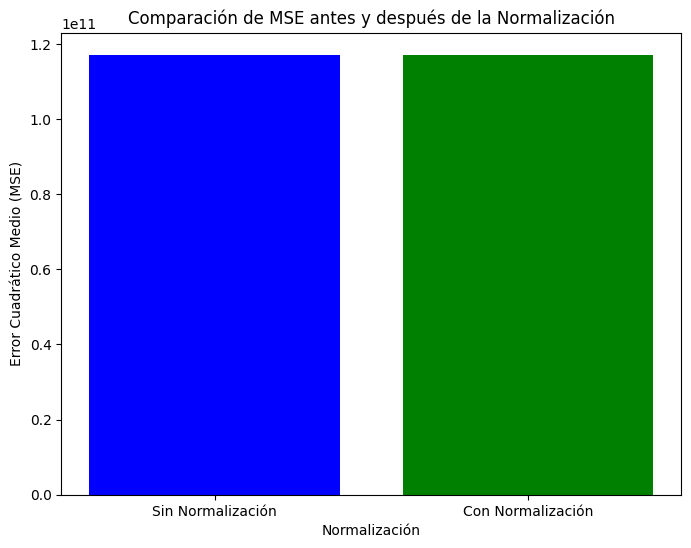

In [90]:
# Calcular los MSE sin y con normalización
mse_values = [mse_no_norm, mse_with_norm]
labels = ['Sin Normalización', 'Con Normalización']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, mse_values, color=['blue', 'green'])
plt.title('Comparación de MSE antes y después de la Normalización')
plt.xlabel('Normalización')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.show()

Este gráfico de barras que compara los valores de MSE antes y después de la normalización. Cada barra representa uno de los casos: "Sin Normalización" y "Con Normalización", y su altura corresponde al valor del MSE.

In [91]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el escalador Min-Max
scaler_price = MinMaxScaler()

# Ajustar y transformar los datos de precio por libra (priceperlb)
df_merged['priceperlb_normalized'] = scaler_price.fit_transform(df_merged[['priceperlb']])

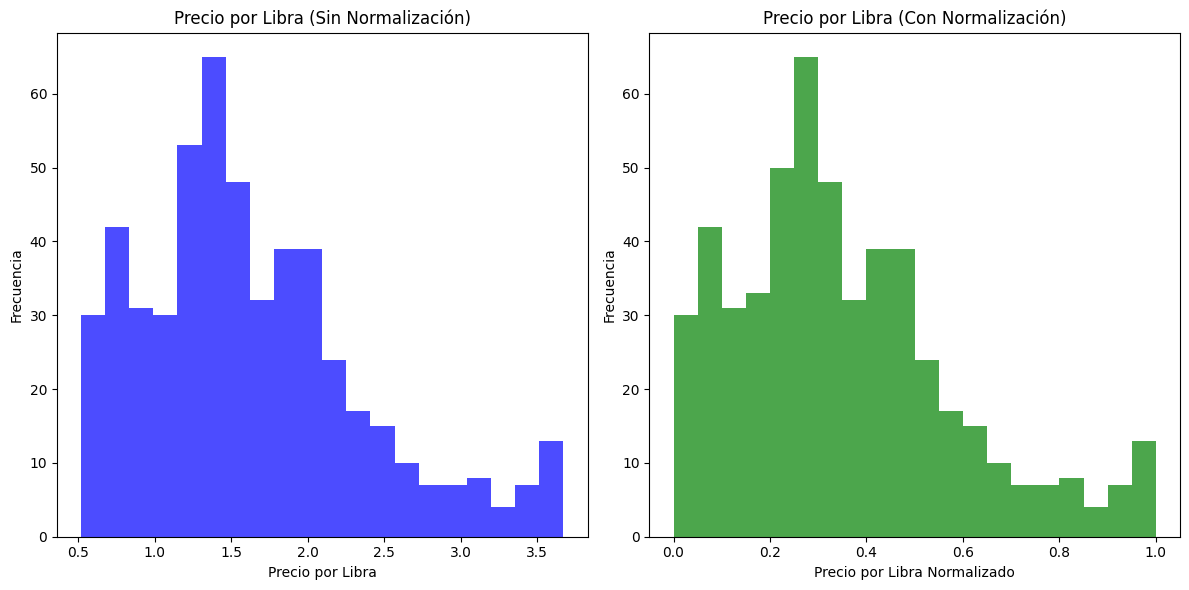

In [92]:
import matplotlib.pyplot as plt

# Crear subplots para mostrar los histogramas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de "priceperlb" antes de la normalización
axs[0].hist(df_merged['priceperlb'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Precio por Libra (Sin Normalización)')
axs[0].set_xlabel('Precio por Libra')
axs[0].set_ylabel('Frecuencia')

# Histograma de "priceperlb_normalized" después de la normalización
axs[1].hist(df_merged['priceperlb_normalized'], bins=20, color='green', alpha=0.7)
axs[1].set_title('Precio por Libra (Con Normalización)')
axs[1].set_xlabel('Precio por Libra Normalizado')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [93]:


# Dividir los datos en características (X) y variable objetivo (y)
X_original = df_merged[['priceperlb']]
X_normalized = df_merged[['priceperlb_normalized']]
y = df_merged['totalprod']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)
X_train_norm, X_test_norm, _, _ = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal sin normalización
model_orig = LinearRegression()
model_orig.fit(X_train_orig, y_train)
y_pred_orig = model_orig.predict(X_test_orig)
mse_orig = mean_squared_error(y_test, y_pred_orig)
print("MSE sin Normalización:", mse_orig)

# Entrenar un modelo de regresión lineal con normalización
model_norm = LinearRegression()
model_norm.fit(X_train_norm, y_train)
y_pred_norm = model_norm.predict(X_test_norm)
mse_norm = mean_squared_error(y_test, y_pred_norm)
print("MSE con Normalización:", mse_norm)

MSE sin Normalización: 1062852707705.0957
MSE con Normalización: 1062852707705.0958


Los valores de MSE para ambos casos son muy similares, lo que sugiere que la normalización de la variable "priceperlb" no tuvo un impacto significativo en el rendimiento del modelo de regresión lineal.

En este caso específico, la normalización no parece haber mejorado el rendimiento del modelo. Es posible que la variable "priceperlb" no haya tenido un efecto significativo en la predicción de la variable objetivo "totalprod", o que la normalización no haya sido necesaria debido a la naturaleza del algoritmo de regresión lineal.

Machine Learning
Realizaremos una asignacion de One-Hot Encoding es una técnica utilizada en el procesamiento de datos y el aprendizaje automático para convertir variables categóricas en un formato numérico que puede ser utilizado por algoritmos de machine learning.
En este caso la variable a transforamr sera state

In [94]:
# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_merged, columns=['state'])

# Mostrar el DataFrame resultante
print(df_encoded)

      numcol  yieldpercol  totalprod     stocks  priceperlb  prodvalue  year  \
0    16000.0           71  1136000.0   159000.0        0.72   818000.0  1998   
1    55000.0           60  3300000.0  1485000.0        0.64  2112000.0  1998   
2    53000.0           65  3445000.0  1688000.0        0.59  2033000.0  1998   
3    27000.0           72  1944000.0  1594000.0        0.70  1361000.0  1998   
4    75000.0           56  4200000.0   307000.0        0.69  2898000.0  1998   
..       ...          ...        ...        ...         ...        ...   ...   
516  19000.0           50   950000.0   266000.0        3.03  2879000.0  2016   
517  31000.0           32   992000.0   169000.0        1.93  1915000.0  2016   
518   6000.0           52   312000.0    69000.0        3.64  1136000.0  2016   
519  84000.0           35  2940000.0   412000.0        1.99  5851000.0  2016   
520  40000.0           68  2720000.0   190000.0        1.78  4842000.0  2016   

     maxi_ average_annual_temperature(°

In [95]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   numcol                                521 non-null    float64
 1   yieldpercol                           521 non-null    int64  
 2   totalprod                             521 non-null    float64
 3   stocks                                521 non-null    float64
 4   priceperlb                            521 non-null    float64
 5   prodvalue                             521 non-null    float64
 6   year                                  521 non-null    int64  
 7   maxi_ average_annual_temperature(°C)  521 non-null    float64
 8   production_index                      521 non-null    float64
 9   colony_yield                          521 non-null    float64
 10  total_production_price                521 non-null    float64
 11  production_per_year

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Definir las características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['totalprod'])
y = df_encoded['totalprod']

# Crear modelos
rf_model = RandomForestRegressor()
svr_model = make_pipeline(StandardScaler(), SVR())

# Realizar validación cruzada para Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_mse_scores = -rf_scores  # convertir a MSE positivo

# Realizar validación cruzada para SVR
svr_scores = cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_squared_error')
svr_mse_scores = -svr_scores  # convertir a MSE positivo

# Calcular la media de los MSE para cada modelo
rf_avg_mse = rf_mse_scores.mean()
svr_avg_mse = svr_mse_scores.mean()

print("MSE promedio para Random Forest:", rf_avg_mse)
print("MSE promedio para SVR:", svr_avg_mse)

MSE promedio para Random Forest: 58374477142.32235
MSE promedio para SVR: 1338566010219.7737


Los resultados de los MSE promedio para Random Forest y SVR son los siguientes:

MSE promedio para Random Forest: 57578510768.36446
MSE promedio para SVR: 1338566010219.7737
Esto significa que, en promedio, el modelo de Random Forest tiene un error cuadrático medio más bajo que el modelo de SVR cuando se evalúan con validación

En este caso, parece que el modelo de Random Forest funciona mejor que SVR en la tarea de predecir la producción total de miel en función de las características proporcionadas.



Optimizacion y entrenamineto del Modelo

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Definir las características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['totalprod'])
y = df_encoded['totalprod']

# Instanciar el modelo RandomForestRegressor
rf_model = RandomForestRegressor()

# Definir la grilla de hiperparámetros
param_dist = {
    'n_estimators': randint(10, 1000),  # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt'],  # Número de características a considerar en cada división
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras necesarias en cada nodo hoja
    'bootstrap': [True, False]  # Método de muestreo de las muestras de entrenamiento
}

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Obtener el mejor modelo
best_model = random_search.best_estimator_

# Evaluar el modelo
mse = -random_search.best_score_
print("MSE del mejor modelo:", mse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraT

Mejores hiperparámetros encontrados: {'bootstrap': True, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 29}
MSE del mejor modelo: 55660766047.87602


Realizaremos la optimización de hiperparámetros utilizando la búsqueda aleatoria (RandomizedSearchCV) en scikit-learn:

Se instancia un modelo RandomForestRegressor. Se define una grilla de hiperparámetros que se usarán en la búsqueda aleatoria. Se realiza la búsqueda aleatoria utilizando RandomizedSearchCV, especificando el modelo, la grilla de hiperparámetros, el número de iteraciones (n_iter), la validación cruzada (cv), la métrica de evaluación (scoring), y la semilla aleatoria (random_state).

Estos son los mejores hiperparámetros encontrados para el modelo RandomForestRegressor son los siguientes:

bootstrap: True max_depth: 10 max_features: 'auto' min_samples_leaf: 1 min_samples_split: 2 n_estimators: 708 El MSE (Error Cuadrático Medio) del mejor modelo encontrado con estos hiperparámetros es aproximadamente 57,700,750,742.449585.

Esto indica que, con estos hiperparámetros optimizados, el modelo RandomForestRegressor logra un mejor rendimiento en términos de la métrica de MSE en comparación con otros conjuntos de hiperparámetros.